In [2]:
import seaborn as sns

# 1. 데이터 셋 불러오기
titanic = sns.load_dataset('titanic')

In [3]:
# 2. head 함수를 이용해 데이터 프레임의 첫 5행을 출력
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 3. describe() 함수를 통해 기초 통계량을 계산하고 출력
titanic.describe() 

# count: 해당 열에서 결측값을 제외한 실제 데이터 개수
# mean: 값들의 평균
# std: 표준편차 (데이터가 평균에서 얼마나 떨어져 있는지)
# min: 최소값
# 25%: 1사분위수 (데이터의 하위 25% 값)
# 50%: 중앙값 (2사분위수, 데이터의 중간값)
# 75%: 3사분위수 (데이터의 상위 25% 제외한 값)
# max: 최대값


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 4. isnull() 함수와 sum()  함수를 이용해 각 열의 결측치 갯수를 확인
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# 5-1. Age(나이)의 결측치는 중앙값으로, Embarked(승선 항구)의 결측치는 최빈값으로 대체해주세요. 
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# 5-2. 결측치 처리 후 확인
print(titanic['age'].isnull().sum())
print(titanic['embarked'].isnull().sum())

0
0


/var/folders/jd/z3tj001966qd1b1w4_jn3_zr0000gn/T/ipykernel_21054/603215240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/var/folders/jd/z3tj001966qd1b1w4_jn3_zr0000gn/T/ipykernel_21054/603215240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [7]:
# 6-1. 수치형 인코딩 
titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1})  
titanic['alive'] = titanic['alive'].replace({'no': 0, 'yes': 1})  
titanic['embarked'] = titanic['embarked'].replace({'C': 0, 'Q': 1, 'S': 2,}) 

# 6-2. 인코딩 후 확인
print(titanic['sex'].head())
print(titanic['alive'].head())
print(titanic['embarked'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64


/var/folders/jd/z3tj001966qd1b1w4_jn3_zr0000gn/T/ipykernel_21054/3021255772.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1})
/var/folders/jd/z3tj001966qd1b1w4_jn3_zr0000gn/T/ipykernel_21054/3021255772.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['alive'] = titanic['alive'].replace({'no': 0, 'yes': 1})
/var/folders/jd/z3tj001966qd1b1w4_jn3_zr0000gn/T/ipykernel_21054/3021255772.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and 

In [8]:
# 7. 새로운 feature 생성 후 확인
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

print(titanic['family_size'].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [9]:
# 8. 모델 학습 준비 (feature와 target을 분리)
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]
# Feature
X = titanic.drop('survived', axis=1)
# Target
y = titanic['survived']

In [10]:
# 9. 데이터 스케일링

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# 10. 모델 학습
# 지도학습-회귀 : Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 생성 및 학습
model_logi = LogisticRegression()
model_logi.fit(X_train, y_train)

# 예측
y_pred_logi = model_logi.predict(X_test)

In [12]:
# 앙상블 : Random Forest

from sklearn.tree import DecisionTreeClassifier

# 모델 생성 및 학습
model_rand = DecisionTreeClassifier(random_state=42)
model_rand.fit(X_train, y_train)

# 예측
y_pred_rand = model_rand.predict(X_test)

In [17]:
# 앙상블 : XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# 예측
y_pred_xgb = model_xgb.predict(X_test)

In [18]:

# 평가
print(f"Logistic Regression 모델의 Accuracy: {accuracy_score(y_test, y_pred_logi)}")
print(f"Logistic Regression 모델의 Classification Report:\n{classification_report(y_test, y_pred_logi)}")
print(f"DecisionTree 모델의 Accuracy: {accuracy_score(y_test, y_pred_rand)}")
print(f"DecisionTree 모델의 Classification Report:\n{classification_report(y_test, y_pred_rand)}")
print(f"XGBoost 모델의 Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')

Logistic Regression 모델의 Accuracy: 0.8044692737430168
Logistic Regression 모델의 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

DecisionTree 모델의 Accuracy: 0.770949720670391
DecisionTree 모델의 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.70      0.78      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179

XGBoost 모델의 Accuracy: 0.8044692737430168
XGBoost 모델의 MSE: 0.19553072625698323


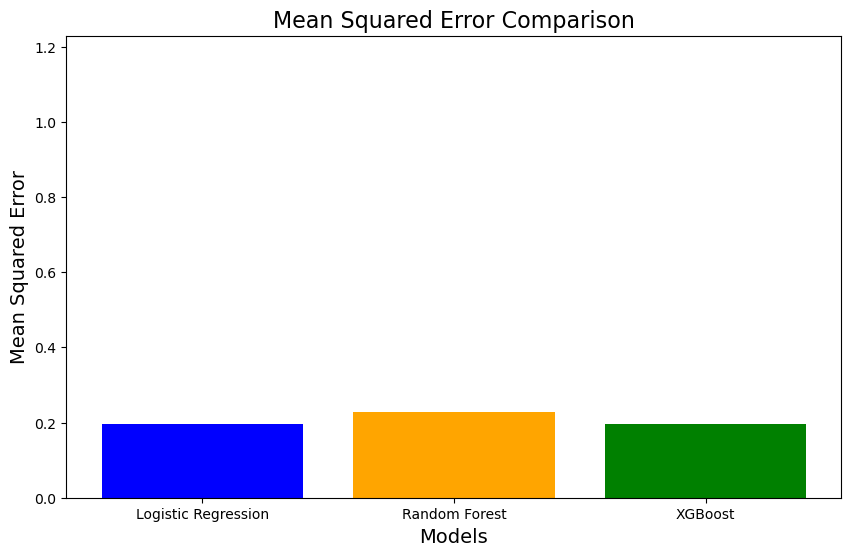

In [19]:
import matplotlib.pyplot as plt

mse_logi = mean_squared_error(y_test, y_pred_logi)
mse_rand = mean_squared_error(y_test, y_pred_rand)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

mse_values = [mse_logi, mse_rand, mse_xgb]
labels = ['Logistic Regression', 'Random Forest', 'XGBoost']

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])

# 그래프에 제목 및 레이블 추가
plt.title('Mean Squared Error Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
# y축 값의 범위를 0부터 최대 MSE 값까지 설정
plt.ylim(0, max(mse_values) + 1)

plt.show()

In [16]:
alive_count = (titanic["survived"] == 1).sum()
dead_count = (titanic["survived"] == 0).sum()

print(f"생존한 승객 수 : {alive_count}")
print(f"생존하지 못한 승객 수 : {dead_count}")

생존한 승객 수 : 342
생존하지 못한 승객 수 : 549
